
# 数据预处理

数据预处理的几种方法：标准化、数据最大最小缩放处理、正则化、特征二值化和数据缺失值处理。sklearn中包含众多数据预处理和特征工程相关的模块，其中,有两块都是关于数据预处理和特征工程的。

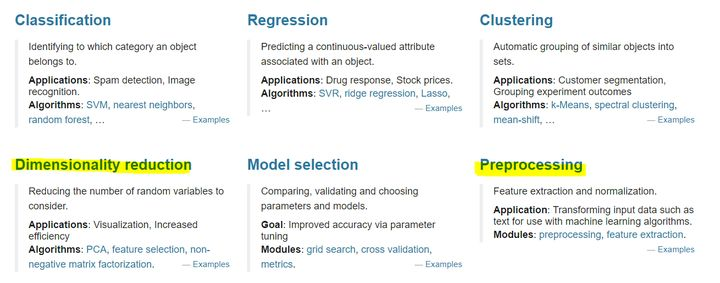

- **模块preprocessing：几乎包含数据预处理的所有内容**
- **模块Impute：填补缺失值专用**
- **模块feature_selection：包含特征选择的各种方法的实践**
- **模块decomposition：包含降维算法**


## 数据无量纲化

在机器学习算法实践中，我们往往有着将不同规格的数据转换到同一规格，或不同分布的数据转换到某个特定分布的需求，这种需求统称为将数据“无量纲化”。

数据的无量纲化可以是线性的，也可以是非线性的。线性的无量纲化包括中心化（Zero-centered或者Mean-subtraction）处理和缩放处理（Scale）。中心化的本质是让所有记录减去一个固定值，即让数据样本数据平移到某个位置。缩放的本质是通过除以一个固定值，将数据固定在某个范围之中，取对数也算是一种缩放处理。

### Min-Max标准化

Min-Max标准化又称最小-最大规范化,是指对原始数据进行线性变换，将值映射到[0,1]或指定范围之间。

数据(x)按照最小值中心化后，再按极差（最大值 - 最小值）缩放，数据移动了最小值个单位，并且会被收敛到[0,1]之间，其公式为：
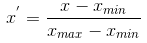

式中，x为原始数据的数据，$x_{min}$为原始数据的最小值，$x_{max}$为原始数据的最大值。


In [1]:
import numpy as np

arr = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
x_max = max(arr)  # 最大值
x_min = min(arr)  # 最小值
x_mean = sum(arr) / len(arr) # 平均值
x_std = np.std(arr)   # 标准差

print("原始数据：\n{}".format(arr))

distance = x_max-x_min

arr_=[]
for x in arr:
    arr_.append(round((x-x_min)/distance,4))   # 保留4位小数
    
print("Min_Max标准化结果：\n{}".format(arr_))

原始数据：
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
Min_Max标准化结果：
[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]


在sklearn当中，使用preprocessing.MinMaxScaler来实现这个功能。MinMaxScaler有一个重要参数 feature_range，控制数据压缩范围，默认是[0,1]。

In [3]:
from sklearn.preprocessing import MinMaxScaler
array=np.array(arr)
array=array.reshape(-1,1)

scaler=MinMaxScaler(feature_range=[0,1]).fit(array)
array_scaler=scaler.transform(array)
array_scaler

ModuleNotFoundError: No module named 'sklearn'

In [1]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 22.2 MB 51 kB/s             
     |████████████████████████████████| 25.9 MB 55 kB/s             
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=836cee73f17af1ada751d76f751dd5d7fd3a998d8fbd50ce2f695cb70b058d8c
  Stored in directory: /root/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.



### Z-Score标准化

Z-Score标准化又称为Standard Score（标准分数），指基于原始数据的均值（mean）和标准差（standard deviation）来进行数据的标准化。

数据(x)按均值(μ)中心化后，再按标准差(σ)缩放，数据就会服从为均值为0，方差为1的正态分布（即标准正态分布）,其公式为:
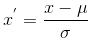

式中，x为原始数据的数据，μ为原始数据的均值，σ为原始数据的标准差。



In [4]:
print("原始数据：\n{}".format(arr))

arr_ = list()
for x in arr:
    arr_.append(round((x-x_mean)/x_std,4))
print("Z_Score标准化结果：\n{}".format(arr_))

原始数据：
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
Z_Score标准化结果：
[-1.5492, -1.1619, -0.7746, -0.3873, 0.0, 0.3873, 0.7746, 1.1619, 1.5492]


In [5]:
from sklearn.preprocessing import StandardScaler

array=np.array(arr)
array=array.reshape(-1,1)

scaler2=StandardScaler().fit(array)    #fit，本质是生成均值和方差
array_scaler=scaler2.transform(array)  #通过接口导出结果

#使用fit_transform(data)一步达成结果
array_scaler=StandardScaler().fit_transform(array) 
array_scaler

ModuleNotFoundError: No module named 'sklearn'

In [5]:
#使用inverse_transform逆转标准化
scaler2.inverse_transform(array_scaler)         

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [6]:
scaler2.mean_                            #查看均值的属性mean_


array([5.])

In [7]:
scaler2.var_                             #查看方差的属性var_

array([6.66666667])

除了StandardScaler和MinMaxScaler之外，sklearn中也提供了各种其他缩放处理（中心化只需要一个pandas广播一下减去某个数就好了，因此sklearn不提供任何中心化功能）。比如，在希望压缩数据，却不影响数据的稀疏性时（不影响矩阵中取值为0的个数时），我们会使用MaxAbsScaler；在异常值多，噪声非常大时，我们可能会选用分位数来无量纲化，此时使用RobustScaler。更多详情请参考以下列表。

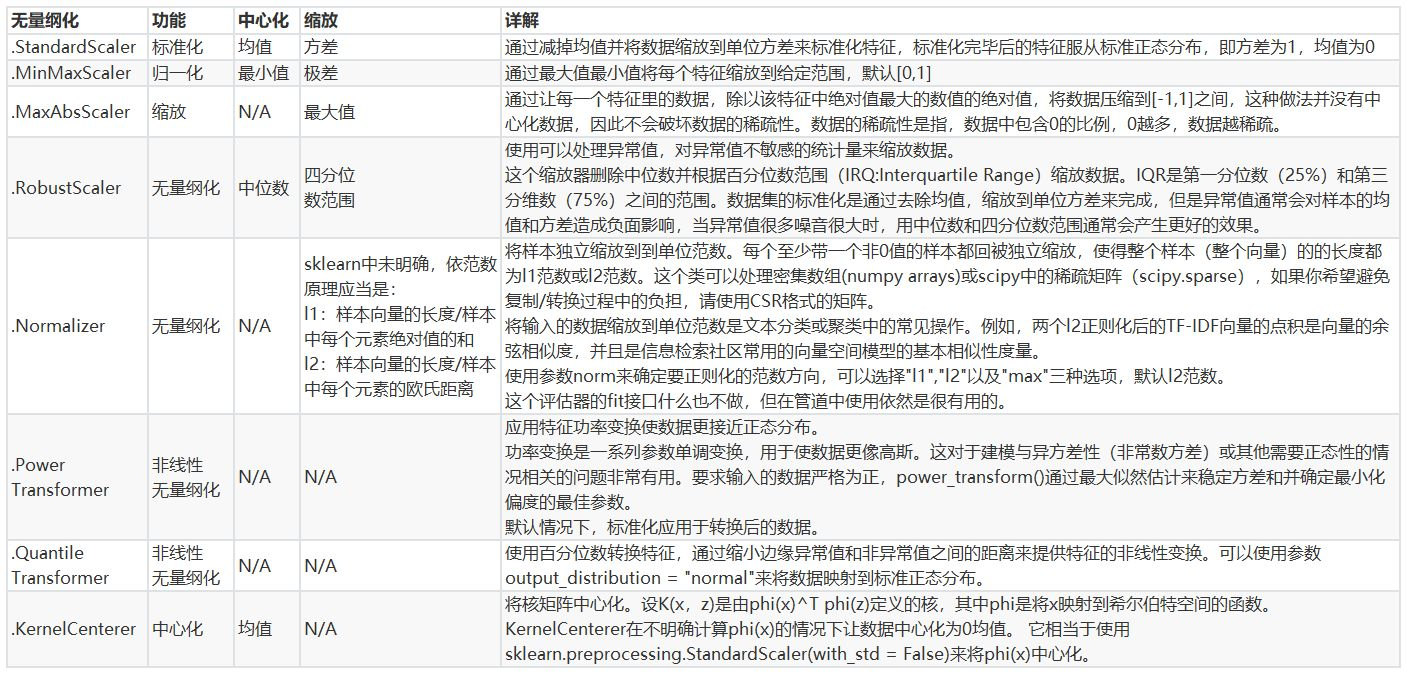

## 处理分类型特征：编码与哑变量

在机器学习中，大多数算法，譬如逻辑回归，支持向量机SVM，k近邻算法等都只能够处理数值型数据，不能处理文字，在sklearn当中，除了专用来处理文字的算法，其他算法在fit的时候全部要求输入数组或矩阵，也不能够导入文字型数据（其实手写决策树和普斯贝叶斯可以处理文字，但是sklearn中规定必须导入数值型）。然而在现实中，许多标签和特征在数据收集完毕的时候，都不是以数字来表现的。比如说，学历的取值可以是["小学"，“初中”，“高中”，"大学"]，付费方式可能包含["支付宝"，“现金”，“微信”]等等。在这种情况下，为了让数据适应算法和库，我们必须将数据进行编码，即是说，将文字型数据转换为数值型。

### LabelEncoder 标签分类编码


In [ ]:
# import pandas as pd
data=pd.DataFrame([["秋沛","<8000","大专"],
                   ["沛白","10000-15000","本科"],
                   ["白易",">15000","研究生"],
                   ["易梦",">=10000","本科"]])
data

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd 

y = data.iloc[:,-1]                         #要输入的是标签，不是特征矩阵，所以允许一维

le = LabelEncoder()                         #实例化
le = le.fit(y)                              #导入数据
label = le.transform(y)                     #transform接口调取结果

le.classes_                                 #属性.classes_查看标签中究竟有多少类别
label                                       #查看获取的结果label

le.fit_transform(y)                         #也可以直接fit_transform一步到位

le.inverse_transform(label)                 #使用inverse_transform可以逆转

data.iloc[:,-1] = label                     #让标签等于我们运行出来的结果

data.head()


In [ ]:
#如果不需要教学展示的话我会这么写：
from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1] = LabelEncoder().fit_transform(data.iloc[:,-1])

### OrdinalEncoder 特征分类编码


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#接口categories_对应LabelEncoder的接口classes_，一模一样的功能
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_

data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])

data_.head()

### OneHotEncoder独热编码


我们刚才已经用OrdinalEncoder把分类变量Sex和Embarked都转换成数字对应的类别了。在舱门Embarked这一列中，我们使用[0,1,2]代表了三个不同的舱门，然而这种转换是正确的吗？

我们来思考三种不同性质的分类数据：

1） 舱门（S，C，Q）

三种取值S，C，Q是相互独立的，彼此之间完全没有联系，表达的是S≠C≠Q的概念。这是名义变量。

2） 学历（小学，初中，高中）

三种取值不是完全独立的，我们可以明显看出，在性质上可以有高中>初中>小学这样的联系，学历有高低，但是学历取值之间却不是可以计算的，我们不能说小学 + 某个取值 = 初中。这是有序变量。

3） 体重（>45kg，>90kg，>135kg）

各个取值之间有联系，且是可以互相计算的，比如120kg - 45kg = 90kg，分类之间可以通过数学计算互相转换。这是有距变量。

然而在对特征进行编码的时候，这三种分类数据都会被我们转换为[0,1,2]，这三个数字在算法看来，是连续且可以计算的，这三个数字相互不等，有大小，并且有着可以相加相乘的联系。所以算法会把舱门，学历这样的分类特征，都误会成是体重这样的分类特征。这是说，我们把分类转换成数字的时候，忽略了数字中自带的数学性质，所以给算法传达了一些不准确的信息，而这会影响我们的建模。

类别OrdinalEncoder可以用来处理有序变量，但对于名义变量，我们只有使用哑变量的方式来处理，才能够尽量向算法传达最准确的信息：


这样的变化，让算法能够彻底领悟，原来三个取值是没有可计算性质的，是“有你就没有我”的不等概念。在我们的数据中，性别和舱门，都是这样的名义变量。因此我们需要使用独热编码，将两个特征都转换为哑变量。

In [33]:
data.head()

from sklearn.preprocessing import OneHotEncoder
X = data.iloc[:,1:-1]

enc = OneHotEncoder(categories='auto').fit(X)
result = enc.transform(X).toarray()
result

#依然可以直接一步到位，但为了给大家展示模型属性，所以还是写成了三步
OneHotEncoder(categories='auto').fit_transform(X).toarray()

#依然可以还原
pd.DataFrame(enc.inverse_transform(result))

enc.get_feature_names()

result
result.shape

#axis=1,表示跨行进行合并，也就是将量表左右相连，如果是axis=0，就是将量表上下相连
newdata = pd.concat([data,pd.DataFrame(result)],axis=1)

newdata.head()

newdata.drop(["Sex","Embarked"],axis=1,inplace=True)

newdata.columns = ["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"]

newdata.head()

KeyError: "['Sex' 'Embarked'] not found in axis"